In [802]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [803]:
adnimerge=pd.read_csv('../data/ADNIMERGE_14Oct2024.csv')
unsam_data=pd.read_csv('../data/UNSAMparticipants.csv')

BAN_ADNI=pd.read_csv('../results/BrainAgeNeXt/BAN_ADNI.csv')
DBN_ADNI=pd.read_csv('../results/DeepBrainNet/DBN_ADNI_BET.csv')
pyment_ADNI=pd.read_csv('../results/pyment/pyment_ADNI.csv')
ENIGMA_ADNI=pd.read_csv('../results/ENIGMA/ENIGMA_ADNI.csv')

BAN_UNSAM=pd.read_csv('../results/BrainAgeNeXt/BAN_UNSAM.csv')
DBN_UNSAM=pd.read_csv('../results/DeepBrainNet/DBN_UNSAM.csv')
pyment_UNSAM=pd.read_csv('../results/pyment/pyment_UNSAM.csv')
ENIGMA_UNSAM=pd.read_csv('../results/ENIGMA/ENIGMA_UNSAM.csv')

C:\Users\parri\AppData\Local\Temp\ipykernel_8976\2697737962.py:1: DtypeWarning:

Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.



In [804]:
adnimerge=adnimerge[['PTID','PTRACCAT','PTEDUCAT']]
adnimerge['PTRACCAT'].replace({'Unknown':'More than one'}, inplace=True)
unsam_data=unsam_data[['ID','NivelEducativo']]

C:\Users\parri\AppData\Local\Temp\ipykernel_8976\2309524388.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [805]:
#only keep CN participants
BAN_ADNI=BAN_ADNI[BAN_ADNI['Group']=='CN']
DBN_ADNI=DBN_ADNI[DBN_ADNI['Group']=='CN']
pyment_ADNI=pyment_ADNI[pyment_ADNI['Group']=='CN']
ENIGMA_ADNI=ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']

In [806]:
#merge predictions with adnimerge
BAN_ADNI['PTID']=BAN_ADNI['ID'].str.split('_I').str[0]
DBN_ADNI['PTID']=DBN_ADNI['ID'].str.split('_I').str[0]
pyment_ADNI['PTID']=pyment_ADNI['ID'].str.split('_I').str[0]
ENIGMA_ADNI['PTID']=ENIGMA_ADNI['ID'].str.split('_I').str[0]

BAN_ADNI=pd.merge(BAN_ADNI,adnimerge,on='PTID', how='inner')
DBN_ADNI=pd.merge(DBN_ADNI,adnimerge,on='PTID',how='inner')
pyment_ADNI=pd.merge(pyment_ADNI,adnimerge,on='PTID',how='inner')
ENIGMA_ADNI=pd.merge(ENIGMA_ADNI,adnimerge,on='PTID',how='inner')

pyment_ADNI.drop_duplicates(subset=['ID'], keep='first', inplace=True,ignore_index=True)
DBN_ADNI.drop_duplicates(subset=['ID'], keep='first', inplace=True,ignore_index=True)
ENIGMA_ADNI.drop_duplicates(subset=['ID'], keep='first', inplace=True,ignore_index=True)
BAN_ADNI.drop_duplicates(subset=['ID'], keep='first', inplace=True,ignore_index=True)

In [807]:
#prepare dataframes for concatenation
BAN_ADNI=BAN_ADNI[['ID','Age','Error','Absolute_Error','PTRACCAT','PTEDUCAT']]
DBN_ADNI.rename(columns={'Absolute_error':'Absolute_Error'}, inplace=True)
DBN_ADNI=DBN_ADNI[['ID','Age','Error','Absolute_Error','PTRACCAT','PTEDUCAT']]
pyment_ADNI=pyment_ADNI[['ID','Age','Error','Absolute_Error','PTRACCAT','PTEDUCAT']]
ENIGMA_ADNI.rename(columns={'Absolute Error':'Absolute_Error'}, inplace=True)
ENIGMA_ADNI=ENIGMA_ADNI[['ID','Age','Error','Absolute_Error','PTRACCAT','PTEDUCAT']]

In [808]:
#concat dataframes
#ADNI_concat=pd.concat([BAN_ADNI,DBN_ADNI,pyment_ADNI,ENIGMA_ADNI], ignore_index=True)

In [809]:
#porcentaje de cantidad de sujetos por grupo étnico
BAN_ADNI.groupby("PTRACCAT")["Error"].median()

PTRACCAT
Am Indian/Alaskan    1.654794
Asian               -1.234357
Black               -4.294098
More than one       -1.409548
White               -2.416158
Name: Error, dtype: float64

In [810]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

In [811]:
datasets = {
    "ENIGMA": ENIGMA_ADNI,
    "DeepBrainNet": DBN_ADNI,
    "Pyment": pyment_ADNI,
    "BrainAgeNeXt": BAN_ADNI
}
ENIGMA_ADNI["PTRACCAT"] = pd.Categorical(ENIGMA_ADNI["PTRACCAT"], categories=["White", "Black", "Asian", "More than one"], ordered=True)
ethnicity_order = ["White", "Black", "More than one", "Asian"]

# Crear figura con subplots 2x2
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=list(datasets.keys()),
    horizontal_spacing=0.025,
    vertical_spacing=0.09
)

axis_index = 1
row = 1
col = 1

for name, df in datasets.items():

    df = df.loc[df["PTRACCAT"].isin(ethnicity_order)].copy()
    df["PTRACCAT"] = pd.Categorical(df["PTRACCAT"], categories=["White", "Black", "Asian", "More than one"], ordered=True)
    # Mediana del dataset actual
    global_median = df['Error'].median()
    medians = df.groupby("PTRACCAT")["Error"].median().reindex(ethnicity_order)

    Ns = {"White": 444, "Black": 62, "Asian": 13, "More than one": 15}
    labels = [f"{e}<br>(N={Ns[e]})" for e in ethnicity_order]

    fig.add_trace(
        go.Box(
            x=df["PTRACCAT"],
            y=df["Error"],
            marker_color="red",
            boxmean=False,
            name=name,
            showlegend=False
        ),
        row=row, col=col
    )

    fig.add_trace(
        go.Scatter(
            x=ethnicity_order,
            y=medians.values,
            mode="text",
            text=[f"{m:.2f}" if not pd.isna(m) else "" for m in medians.values],
            textposition="top center",
            textfont=dict(size=14, color="black"),
            showlegend=False
        ),
        row=row, col=col
    )

    # --- LÍNEA PUNTEADA PARA ESTE SUBPLOT ---
    xref = f"x{axis_index} domain" if axis_index > 1 else "x domain"
    yref = f"y{axis_index}" if axis_index > 1 else "y"

    fig.add_shape(
        type="line",
        x0=0, x1=1,
        y0=global_median, y1=global_median,
        line=dict(color="black", width=2, dash="dash"),
        xref=xref,
        yref=yref
    )
    fig.add_trace(
        go.Scatter(
            x=[3.7],   
            y=[global_median+1],
            mode="text",
            text=[f"{global_median:.2f}"],
            textfont=dict(size=14, color="black"),
            showlegend=False,
        ),
        row=row, col=col
    )

    # Actualizar ejes
    fig.update_xaxes(
        ticktext=labels,
        tickvals=ethnicity_order,
        tickfont=dict(size=13),
        row=row, col=col,
        color='black'
    )

    if name in ['ENIGMA', 'Pyment']:
        fig.update_yaxes(title_text="BAG", row=row, col=col)

    fig.update_yaxes(
        tickfont=dict(size=14),
        title_font=dict(size=18),
        showgrid=True, gridcolor='grey',
        zeroline=True, zerolinecolor='black',
        range=[-40, 20],
        row=row, col=col
    )

    # --- AVANZAR SUBPLOT ---
    col += 1
    if col == 3:
        col = 1
        row += 1

    axis_index += 1   # ← IMPORTANTE

# Ajuste general
fig.update_annotations(font_size=20)
fig.update_layout(
    height=800,
    width=1200,
    font=dict(size=14),
    margin=dict(l=20, r=20, t=30, b=10)
)

fig.show()


C:\Users\parri\AppData\Local\Temp\ipykernel_8976\3527680949.py:28: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\parri\AppData\Local\Temp\ipykernel_8976\3527680949.py:28: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\parri\AppData\Local\Temp\ipykernel_8976\3527680949.py:28: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\parri\AppData\Local\Temp\ipykernel_8976\3527680949.py:28: FutureWarning:

Th

In [812]:
from scipy import stats

In [813]:

def t_test_error(df, group1, group2):
    group1_errors = df[df['PTRACCAT'] == group1]['Error']
    group2_errors = df[df['PTRACCAT'] == group2]['Error']
    t_stat, p_value = stats.ttest_ind(group1_errors, group2_errors, equal_var=False)
    return t_stat, p_value

datasets = {
    'df': BAN_ADNI,
}

results = {}
for name, df in datasets.items():
    ethnicity_groups = df['PTRACCAT'].unique()
    results[name] = {}
    for i, group1 in enumerate(ethnicity_groups):
        for group2 in ethnicity_groups[i+1:]:
            t_stat, p_value = t_test_error(df, group1, group2)
            results[name][f"{group1} vs {group2}"] = {'t_stat': t_stat, 'p_value': p_value}

# Show results
for name, comparisons in results.items():
    print(f"\n{name}:")
    for comparison, result in comparisons.items():
        print(f"  {comparison}: t-statistic = {result['t_stat']:.3f}, p-value = {result['p_value']:.3f}")


df:
  White vs Black: t-statistic = 2.721, p-value = 0.008
  White vs Asian: t-statistic = -2.114, p-value = 0.055
  White vs More than one: t-statistic = -0.948, p-value = 0.357
  White vs Am Indian/Alaskan: t-statistic = nan, p-value = nan
  Black vs Asian: t-statistic = -3.199, p-value = 0.005
  Black vs More than one: t-statistic = -2.531, p-value = 0.016
  Black vs Am Indian/Alaskan: t-statistic = nan, p-value = nan
  Asian vs More than one: t-statistic = 1.270, p-value = 0.218
  Asian vs Am Indian/Alaskan: t-statistic = nan, p-value = nan
  More than one vs Am Indian/Alaskan: t-statistic = nan, p-value = nan


In [814]:
DBN_ADNI.dropna(inplace=True)
DBN_ADNI['PTRACCAT'].value_counts()

PTRACCAT
White                382
Black                 54
More than one         12
Asian                 10
Am Indian/Alaskan      1
Name: count, dtype: int64

Shapiro-Wilk p-value: 0.0050231629766147815
Anderson-Darling stat: 0.2508521540232209
Critical values: [0.571 0.65  0.78  0.91  1.082]


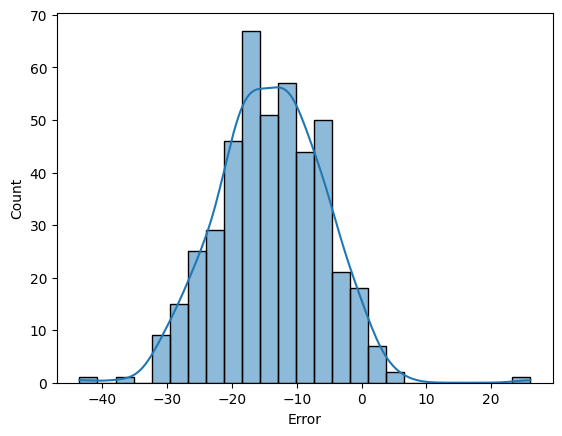

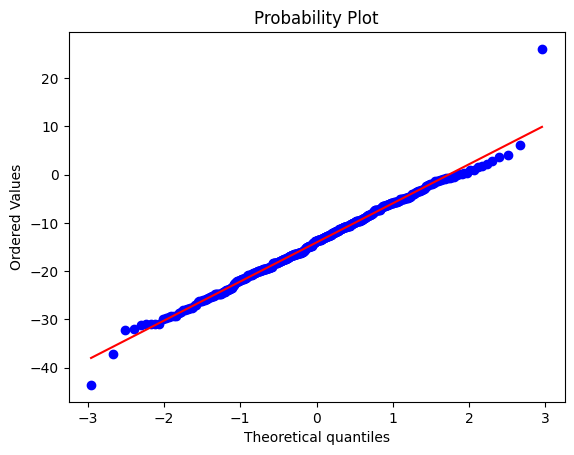

In [815]:
from scipy.stats import shapiro, normaltest, anderson

# Shapiro-Wilk test for normality
variable = ENIGMA_ADNI[ENIGMA_ADNI['PTRACCAT']=='White']['Error']

stat, p = shapiro(variable)
print("Shapiro-Wilk p-value:", p)

# Anderson-Darling test
result = anderson(variable)
print("Anderson-Darling stat:", result.statistic)
print("Critical values:", result.critical_values)

sns.histplot(variable, kde=True)
plt.show()
stats.probplot(variable, dist="norm", plot=plt)
plt.show()



In [816]:
#mean absolute error by PTRACCAT
print(f'White MAE',BAN_ADNI[BAN_ADNI['PTRACCAT']=='White']['Absolute_Error'].mean())
print(f'Black MAE',BAN_ADNI[BAN_ADNI['PTRACCAT']=='Black']['Absolute_Error'].mean())
print(f'Asian MAE',BAN_ADNI[BAN_ADNI['PTRACCAT']=='Asian']['Absolute_Error'].mean())
print(f'More than one MAE',BAN_ADNI[BAN_ADNI['PTRACCAT']=='More than one']['Absolute_Error'].mean())

White MAE 3.9342748482994025
Black MAE 5.520543110680957
Asian MAE 3.5796904719426044
More than one MAE 2.4739135559082026


## education level influence on predictions

In [817]:
#BAN_UNSAM=BAN_UNSAM[BAN_UNSAM['Grupo']=="CONTROL"]
#DBN_UNSAM=DBN_UNSAM[DBN_UNSAM['Grupo']=="CONTROL"]
#pyment_UNSAM=pyment_UNSAM[pyment_UNSAM['Grupo']=="CONTROL"]
#ENIGMA_UNSAM=ENIGMA_UNSAM[ENIGMA_UNSAM['Grupo']=="CONTROL"]

In [818]:
unsam_data['NivelEducativo'].dropna(inplace=True)
BAN_UNSAM.rename(columns={'Predicted_Brain_Age':'prediction', 'Edad':'Age'},inplace=True)
BAN_UNSAM=pd.merge(BAN_UNSAM,unsam_data, on='ID', how='inner')

DBN_UNSAM.rename(columns={'Pred_Age':'prediction', 'Edad':'Age'},inplace=True)
DBN_UNSAM=pd.merge(DBN_UNSAM,unsam_data, on='ID', how='inner')

pyment_UNSAM.rename(columns={'Edad':'Age'},inplace=True)
pyment_UNSAM=pd.merge(pyment_UNSAM,unsam_data, on='ID', how='inner')

ENIGMA_UNSAM.rename(columns={'Edad':'Age','Absolute Error': 'Absolute_Error'},inplace=True)
ENIGMA_UNSAM=pd.merge(ENIGMA_UNSAM,unsam_data, on='ID', how='inner')

In [819]:
educ_map = {
    "Sin instrucción": 0,
    "Primario incompleto": 4,
    "Primario completo": 6,
    "Secundario incompleto": 9,
    "Secundario completo": 12,
    "Terciario incompleto": 13,
    "Terciario completo": 14,
    "Universitario incompleto": 14,
    "Universitario completo": 16,
    "Posgrado": 19
}

# Crear nueva columna
BAN_UNSAM["PTEDUCAT"] = BAN_UNSAM["NivelEducativo"].map(educ_map)
DBN_UNSAM["PTEDUCAT"] = DBN_UNSAM["NivelEducativo"].map(educ_map)
pyment_UNSAM["PTEDUCAT"] = pyment_UNSAM["NivelEducativo"].map(educ_map)
ENIGMA_UNSAM["PTEDUCAT"] = ENIGMA_UNSAM["NivelEducativo"].map(educ_map)


In [820]:
BAN_concat=pd.concat([BAN_ADNI,BAN_UNSAM],ignore_index=True)
DBN_concat=pd.concat([DBN_ADNI,DBN_UNSAM],ignore_index=True)
pyment_concat=pd.concat([pyment_ADNI,pyment_UNSAM],ignore_index=True)
ENIGMA_concat=pd.concat([ENIGMA_ADNI,ENIGMA_UNSAM],ignore_index=True)

In [821]:
BAN_concat=BAN_concat[['ID','Age','Error','Absolute_Error','PTEDUCAT']]
BAN_concat.dropna(inplace=True)
DBN_concat=DBN_concat[['ID','Age','Error','Absolute_Error','PTEDUCAT']]
DBN_concat.dropna(inplace=True)
pyment_concat=pyment_concat[['ID','Age','Error','Absolute_Error','PTEDUCAT']]
pyment_concat.dropna(inplace=True)
ENIGMA_concat=ENIGMA_concat[['ID','Age','Error','Absolute_Error','PTEDUCAT']]
ENIGMA_concat.dropna(inplace=True)

In [822]:
BAN_CA_mean=np.mean(BAN_concat['Age'])
DBN_CA_mean=np.mean(DBN_concat['Age'])
pyment_CA_mean=np.mean(pyment_concat['Age'])
ENIGMA_CA_mean=np.mean(ENIGMA_concat['Age'])

BAN_concat['Corrected_age']=BAN_concat['Age']-BAN_CA_mean
DBN_concat['Corrected_age']=DBN_concat['Age']-DBN_CA_mean
pyment_concat['Corrected_age']=pyment_concat['Age']-pyment_CA_mean
ENIGMA_concat['Corrected_age']=ENIGMA_concat['Age']-ENIGMA_CA_mean

In [823]:
BAN_UNSAM['Corrected_age']=BAN_UNSAM['Age']-np.mean(BAN_UNSAM['Age'])
DBN_UNSAM['Corrected_age']=DBN_UNSAM['Age']-np.mean(DBN_UNSAM['Age'])
pyment_UNSAM['Corrected_age']=pyment_UNSAM['Age']-np.mean(pyment_UNSAM['Age'])
ENIGMA_UNSAM['Corrected_age']=ENIGMA_UNSAM['Age']-np.mean(ENIGMA_UNSAM['Age'])

In [824]:
import statsmodels.formula.api as smf

In [825]:
BAN_UNSAM

,ID,prediction,Grupo,Age,Genero,Absolute_Error,Error,NivelEducativo,PTEDUCAT,Corrected_age
0,CP0053,53.864748,COVID,60,F,6.135252,-6.135252,Universitario completo,16.0,11.232673
1,CP0100,44.543446,COVID,50,M,5.456554,-5.456554,Secundario incompleto,9.0,1.232673
2,CP0154,43.123382,COVID,42,M,1.123382,1.123382,Terciario completo,14.0,-6.767327
3,CP0200,57.170476,CONTROL,64,F,6.829524,-6.829524,Secundario incompleto,9.0,15.232673
4,CP0001,29.173784,CONTROL,34,F,4.826216,-4.826216,Posgrado,19.0,-14.767327
...,...,...,...,...,...,...,...,...,...,...
197,CP0242,45.872900,COVID,45,M,0.872900,0.872900,Posgrado,19.0,-3.767327
198,CP0246,46.049595,CONTROL,51,M,4.950405,-4.950405,Universitario incompleto,14.0,2.232673
199,CP0247,42.377428,COVID,47,F,4.622572,-4.622572,Secundario incompleto,9.0,-1.767327
200,CP0249,30.394714,COVID,41,M,10.605286,-10.605286,Secundario incompleto,9.0,-7.767327


In [837]:
# Si tu dataframe se llama BAN_all:
model = smf.ols("Error ~ Corrected_age * PTEDUCAT + Grupo", data=BAN_UNSAM).fit()

model_reduced = smf.ols("Absolute_Error ~ Corrected_age", data=BAN_UNSAM).fit()

print(model.summary())

# R² total 
r2_full = model.rsquared 

# Modelo reducido sin dataset (solo mean) 
r2_reduced = model_reduced.rsquared 

# f² para dataset 
f2_reduced = (r2_full - r2_reduced) / (1 - r2_full)
#0.02= small, 0.15=medium, 0.35=large 
print("f² (variable):", f2_reduced)

                            OLS Regression Results                            
Dep. Variable:                  Error   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     7.591
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           1.06e-05
Time:                        16:22:59   Log-Likelihood:                -590.28
No. Observations:                 198   AIC:                             1191.
Df Residuals:                     193   BIC:                             1207.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [827]:
pyment_concat[pyment_concat.isna().any(axis=1)]

,ID,Age,Error,Absolute_Error,PTEDUCAT,Corrected_age
